# <center>Assignment 1</center>

There are 2 main parts asked in this assignment - Tensorflow Basics and Neural Networks. You can choose to code in Python2 or Python3. All the imports made in this notebook are as below; if these imports work, you are (mostly) set to complete the assignment.

In [2]:
from __future__ import print_function, division
%matplotlib inline
import matplotlib.pyplot as plt
import random 
import tensorflow as tf
import numpy as np

## Tensorflow - Basics

### I. Linear Regression

<b>1a. Creating Sample Data </b>

In [36]:
x = np.random.randn(100, 3)  # 100 data points of dimension 3
w = np.array([[1], [2], [3]])
b = 10
y = np.dot(x, w) + b
n_samples = x.shape[0]

**1b. Plot Data**

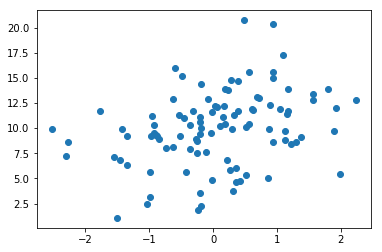

In [37]:
plt.scatter(x.T[0], y.T)

<b>2. Creating Placeholders</b>

In [38]:
X = tf.placeholder(dtype=tf.float32, shape=[None, 3])
Y_Expected = tf.placeholder(dtype=tf.float32, shape=[None, 1])

<b>3. Creating Variables</b>

In [39]:
b = tf.Variable(
    dtype=tf.float32,
    initial_value=np.zeros(shape=(1, 1)),
    name="b")
W = tf.Variable(
    dtype=tf.float32,
    initial_value=np.zeros(shape=w.shape),
    name="W")

<b> 4. Creating Compute Graph </b>

In [40]:
# Define the equation to compute the output variable.
Y = tf.matmul(X, W) + b

# Define the loss function
cost = tf.divide(tf.square(Y_Expected - Y, name="loss"), n_samples)

<b> 5. Training and optimizer </b>

In [41]:
# This part has been done for you already!
# Just run it after you finish coding the above sections.
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(cost)
for epoch in range(30):
    epoch_cost, _ = sess.run([cost, train_op], feed_dict={X: x, Y_Expected: y})
    print(epoch, epoch_cost)

0 [[ 0.23367128]
 [ 2.43590236]
 [ 1.22140634]
 [ 2.24416351]
 [ 0.97417033]
 [ 0.70235223]
 [ 1.91396332]
 [ 1.26079285]
 [ 2.15064168]
 [ 1.04374194]
 [ 0.39531854]
 [ 0.8921324 ]
 [ 0.86004019]
 [ 0.79801732]
 [ 0.1375742 ]
 [ 1.36387289]
 [ 0.84946024]
 [ 0.99483854]
 [ 0.74835676]
 [ 1.22701526]
 [ 1.67737103]
 [ 0.74737138]
 [ 0.04879889]
 [ 0.28373623]
 [ 0.85103679]
 [ 2.41333532]
 [ 0.85047269]
 [ 1.63011587]
 [ 0.01177646]
 [ 0.62563634]
 [ 2.29529428]
 [ 1.48668718]
 [ 0.84382033]
 [ 1.92180526]
 [ 1.94121122]
 [ 0.12570754]
 [ 1.41417587]
 [ 0.50727695]
 [ 1.36370623]
 [ 0.06240673]
 [ 2.56590915]
 [ 2.1882937 ]
 [ 1.08353364]
 [ 0.55915254]
 [ 0.34213009]
 [ 0.03622762]
 [ 4.28922796]
 [ 1.78130412]
 [ 0.94636041]
 [ 1.39680326]
 [ 1.4681716 ]
 [ 1.13248563]
 [ 1.36686432]
 [ 1.08252215]
 [ 1.05948818]
 [ 1.31031764]
 [ 0.29236573]
 [ 0.21215859]
 [ 1.3595196 ]
 [ 1.65362179]
 [ 1.23698652]
 [ 0.51965922]
 [ 1.91630661]
 [ 0.98855966]
 [ 0.76204568]
 [ 0.22956489]
 [ 2.080

<b> 5. Print out parameters </b>

In [42]:
# Replace the None with the correct operation. 
# You should get W close to [[1],[2],[3]] and b close to 10. 
print("W:", sess.run(W))
print("b:", sess.run(b))

W: [[ 1.00719106]
 [ 1.99761581]
 [ 2.98960853]]
b: [[ 9.98534489]]


### II. Matrix Multiplication

In [10]:
def ndmatmul():
    """
      # 3d x 2d Matmul operation. 
      You may find some of these functions useful: einsum, tile, expand_dims.
      :return a: Placeholder for 3d tensor [float64]
              b: Placeholder for 2d tensor [float64]
              c: Matrix Product
    """
    a = tf.placeholder(dtype=tf.float64, name="a", shape=(None, None, None))
    b = tf.placeholder(dtype=tf.float64, name="b", shape=(None, None))
    c = tf.einsum('ijk,kl', a, b)
    return a, b, c

In [11]:
A, B, C = ndmatmul()

In [12]:
np.random.seed(1)
a = np.random.randn(5, 2, 3)
b = np.random.randn(3, 1)
c = np.matmul(a, b)
print(a.shape)
print(b.shape)
print(c.shape)
print(c)

(5, 2, 3)
(3, 1)
(5, 2, 1)
[[[-0.51783421]
  [ 1.98033132]]

 [[-1.12404125]
  [ 1.00805567]]

 [[-0.40371716]
  [ 1.43240346]]

 [[ 0.49588387]
  [-1.49477015]]

 [[-0.26736846]
  [ 0.38907473]]]


In [13]:
# Will give error if function not implemented. Your output should match Numpy's output.
sess = tf.InteractiveSession()
c_tensor = sess.run(C, feed_dict={A: a, B: b})
print(c_tensor)
if (c_tensor - c < 10 ** -10).all():
    print("Correct!")

[[[-0.51783421]
  [ 1.98033132]]

 [[-1.12404125]
  [ 1.00805567]]

 [[-0.40371716]
  [ 1.43240346]]

 [[ 0.49588387]
  [-1.49477015]]

 [[-0.26736846]
  [ 0.38907473]]]
Correct!


### III. Experiments with Feed-forward NN on MNIST

In this Qn, you will experiment with Feed-forward Neural nets while training on the MNIST dataset. Read more about it <a href = "https://en.wikipedia.org/wiki/MNIST_database">here</a>. A random sample of the images has been shown to you.

Extracting MNIST_data/train-images-idx3-ubyte.gz


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


train_data shape:  (55000, 784)
train_labels shape:  (55000, 10)
eval_data shape:  (10000, 784)
eval_labels shape:  (10000, 10)


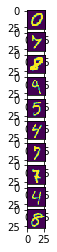

In [3]:
# Load MNIST Data
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images  # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

print("train_data shape: ", train_data.shape)
print("train_labels shape: ", train_labels.shape)
print("eval_data shape: ", eval_data.shape)
print("eval_labels shape: ", eval_labels.shape)

# Randomly choose 10 images from first 50 images of Train Data.
for index, idx in enumerate(random.sample(range(50), 10)): 
    plt.subplot(10, 1, index+1)
    plt.imshow(train_data[idx].reshape(28, 28))

Fill in the following snippet as per the instructions. 
* For initialising placeholders, use None to accommodate variable batch_size. 
* Do not change the seed; use it for comparing epoch-wise loss with your friends.
* You can use the following <a href ="https://www.tensorflow.org/versions/r1.1/get_started/mnist/beginners">tutorial</a> for reference. Note that they use softmax in their example, while you are required to code Feedforward neural network. 


In [24]:
def initializer_1(shape):
    # Do not change the seed. 
    np.random.seed(1)
    return np.random.randn(*shape)


def initializer_2(shape):
    # Do not change the seed.
    np.random.seed(1)
    return 0.01 * np.random.randn(*shape)


class MNIST_ANN:
    def __init__(self, hidden_units, activations, initializer):
        """
        Initialises the weights and builds the compute graph. 
        Uses AdamOptimizer with default parameters for gradient descent.
        :param hidden_units - list of number of hidden units. 
               Eg: [10,20] => Layer 1 has 10 hidden units and Layer 2 has 20.
        :param activations - list of activations for each of the hidden layers.
               Eg: [tf.nn.sigmoid, tf.nn.tanh]
        :param initializer - the reference to the function used for initializing the weights
        """
        # Define constants
        num_input_units = 784
        num_output_units = 10
        num_hidden_layers = len(hidden_units)
        
        # Define the placeholders
        self.input = tf.placeholder(
            dtype=tf.float32,
            shape=[None, num_input_units],
            name="input")
        self.expected_output = tf.placeholder(
            dtype=tf.float32,
            shape=[None, num_output_units],
            name="labels")
        
        # Initialise the weights and biases 
        weights = []
        biases = []
        
        # Populate weights and biases for the input layer
        weights.append(tf.cast(tf.Variable(initial_value=initializer((num_input_units, hidden_units[0]))), tf.float32))
        biases.append(tf.cast(tf.Variable(tf.zeros([hidden_units[0]])), tf.float32))
        
        # Populate weights and biases for all hidden layers
        if num_hidden_layers > 1:
            for i in range(1, num_hidden_layers):
                num_hidden_units = hidden_units[i-1]
                num_hidden_units_next_layer = hidden_units[i]
                w = tf.cast(tf.Variable(initial_value=initializer((num_hidden_units, num_hidden_units_next_layer))), tf.float32)
                b = tf.cast(tf.Variable(tf.zeros([num_hidden_units_next_layer])), tf.float32)
                weights.append(w)
                biases.append(b)
        
        # Populate weights and biases for the output layer
        weights.append(tf.cast(tf.Variable(initial_value=initializer((hidden_units[-1], num_output_units))), tf.float32))
        biases.append(tf.cast(tf.Variable(tf.zeros([hidden_units[-1]])), tf.float32))
        
        # Build the graph for computing output:
        nn_layers = []
        
        # Construct the input
        y = tf.matmul(self.input, weights[0] + biases[0])
        nn_layers.append(activations[0](y))
        
        # Construct all hidden layers
        for i in range(1, num_hidden_layers):
            y = tf.matmul(nn_layers[i-1], weights[i] + biases[i])
            nn_layers.append(activations[i](y))
        
        # Construct the output
        self.output = tf.matmul(nn_layers[-1], weights[-1]) + biases[-1]
        
        # Define the loss and accuracy
        self.cost = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(
                labels=self.expected_output,
                logits=self.output))
        self.accuracy = tf.reduce_mean(
            tf.cast(
                tf.equal(tf.argmax(self.output, 1), tf.argmax(self.expected_output, 1)),
                tf.float32))
        
        # Instantiate the optimizer
        optimizer = tf.train.AdamOptimizer()
        self.train_op = optimizer.minimize(self.cost)
        self.session = tf.Session()
        
        # Initialize all variables
        self.session.run(tf.global_variables_initializer())
    
    def train(self, 
              train_data, 
              train_labels, 
              eval_data, 
              eval_labels, 
              batch_size, 
              epochs=100):
        """
        Trains the model.
        :param train_data - the data to be used for training.
        :param train_labels - the labels to be used for training.
        :param eval_data - the data to be used for evaluation.
        :param eval_labels - the labels to be used for evaluation.
        :param batch_size - The size of the batches of training data.
        :param epochs - the number of iterations to train the model. Default is 100
        """
        sess = self.session

        # Slice the data and labels into batches depending on the batch_size.
        batches = int(train_data.shape[0] / batch_size)
        
        for epoch in range(epochs):
            cost_epoch = 0
            for _ in range(batches):
                input_batch, label_batch = mnist.train.next_batch(batch_size)
                
                # Forward Propagate, compute cost and back-propagate.
                cost, _ = sess.run([self.cost, self.train_op], 
                                   feed_dict={
                                       self.input: input_batch,
                                       self.expected_output: label_batch
                                   })
                cost_epoch += cost
            if epoch % 10 == 0:
                print("Train accuracy: {}".format(self.compute_accuracy(train_data, train_labels)))        
                print("Test accuracy: {}".format(self.compute_accuracy(eval_data, eval_labels)))
            print("Epoch {}: {}".format(epoch, cost_epoch))
        print("Train accuracy: {}".format(self.compute_accuracy(train_data, train_labels)))
        print("Test accuracy: {}".format(self.compute_accuracy(eval_data, eval_labels)))

    def compute_accuracy(self, data, labels):
        """
        Compute the accuracy given input data and labels.
        """
        return self.session.run(
            self.accuracy,
            feed_dict={
                self.input: data, 
                self.expected_output: labels
            })

In [25]:
ann = MNIST_ANN([10], [tf.nn.sigmoid], initializer_1)
ann.train(train_data, 
          train_labels, 
          eval_data, 
          eval_labels, 
          batch_size=10, 
          epochs=3)

Train accuracy: 0.7586908936500549
Test accuracy: 0.7705000042915344
Epoch 0: 7219.651976570487


Epoch 1: 3580.0010548606515


Epoch 2: 2859.8273340277374
Train accuracy: 0.8599272966384888
Test accuracy: 0.8636000156402588


The expected output for the above snippet is
<pre>
Train accuracy: 0.780763626099
Test accuracy: 0.791599988937
Epoch 0: 6768.86486949
Epoch 1: 3275.00310887
Epoch 2: 2590.16959983
Train accuracy: 0.873399972916
Test accuracy: 0.876900017262
</pre>
If you get any other output and you feel you are correct, you can proceed (However, I cannot think of any case where you can get a different output). 

### Answer the following questions by running code snippets. Unless asked explicitly (like in Q1 and Q4), you need to just show the system performance and need not comment.

**1. Use 1 hidden layer of 10 hidden units with sigmoid activation and batch_size=10 for this question. Observe the network performance for initializer_1 and initializer_2 and explain the behavior. Why does this happen? What is your guess for tanh and relu? Why?**

In [29]:
print('Initializer_1')
ann = MNIST_ANN([10], [tf.nn.relu], initializer_1)
ann.train(train_data, 
          train_labels, 
          eval_data, 
          eval_labels, 
          batch_size=10, 
          epochs=3)

print('\n\n\nInitializer_2')
ann = MNIST_ANN([10], [tf.nn.relu], initializer_2)
ann.train(train_data, 
          train_labels, 
          eval_data, 
          eval_labels, 
          batch_size=10, 
          epochs=3)

print('\n\n\nWhy does this happen?')
print('Initializer_2 provides better accuracy scores (approximately 5% better) because the weights are initialized with much smaller values than Initializer_1.')
print('The sigmoid function y = 1 / (1 + exp(-x)) computes bigger values for smaller weights, which means they are initialized with greater values and have more impact from the start of the training.')
print('Initializer_2 uses 0.01 * the values for Initializer_1, (1% of Initializer_1), which is significantly smaller.')
print('\nWhat is your guess for tanh and relu? Why?')
print('My guess for tanh is that it will experience similar results to the sigmoid function, but with a greater difference in accuracy scores bwtween initializers.')
print('This is because tanh ranges values from (-1, 1) compared to sigmoid which ranges values from (0, 1).')
print('My guess for relu is that it will perform worse overall because small values are very close to 0 with this function.')

Initializer_1


Train accuracy: 0.31594544649124146
Test accuracy: 0.3165000081062317
Epoch 0: 12436.835572779179


Epoch 1: 8550.750813364983


Epoch 2: 7436.668827295303
Train accuracy: 0.49878183007240295
Test accuracy: 0.49779999256134033



Initializer_2


Train accuracy: 0.7216727137565613
Test accuracy: 0.7305999994277954
Epoch 0: 5574.391864523292


Epoch 1: 4272.362072907388


Epoch 2: 4019.4721032604575
Train accuracy: 0.7613999843597412
Test accuracy: 0.7705000042915344



Why does this happen?
Initializer_2 provides better accuracy scores (approximately 5% better) because the weights are initialized with much smaller values than Initializer_1.
The sigmoid function y = 1 / (1 + exp(-x)) computes bigger values for smaller weights, which means they are initialized with greater values and have more impact from the start of the training.
Initializer_2 uses 0.01 * the values for Initializer_1, (1% of Initializer_1), which is significantly smaller.

What is your guess for tanh and relu? Why?
My guess for tanh is that it will experience similar results to the sigmoid function, but with a greater difference in accuracy scores bwtween initializers.
This is because tanh ranges values from (-1, 1) compared to sigmoid which ranges values from (0, 1).
My guess for relu


<b>2. Play around with different configurations of the system. Spend some time on <a href="https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.52239&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false"> Tensorflow Playground </a> to get a feel. Just demonstrate the performance of the system and make observations. No need to make any comments. </b>

In [33]:
ann = MNIST_ANN([20, 10], [tf.nn.sigmoid, tf.nn.tanh], initializer_2)
ann.train(train_data, 
          train_labels, 
          eval_data, 
          eval_labels, 
          batch_size=100, 
          epochs=20)

ann = MNIST_ANN([10, 10], [tf.nn.sigmoid, tf.nn.sigmoid], initializer_2)
ann.train(train_data, 
          train_labels, 
          eval_data, 
          eval_labels, 
          batch_size=30, 
          epochs=10)

ann = MNIST_ANN([20, 10], [tf.nn.sigmoid, tf.nn.sigmoid], initializer_2)
ann.train(train_data, 
          train_labels, 
          eval_data, 
          eval_labels, 
          batch_size=50, 
          epochs=10)

ann = MNIST_ANN([10], [tf.nn.tanh], initializer_2)
ann.train(train_data, 
          train_labels, 
          eval_data, 
          eval_labels, 
          batch_size=100, 
          epochs=10)

ann = MNIST_ANN([10], [tf.nn.tanh], initializer_2)
ann.train(train_data, 
          train_labels, 
          eval_data, 
          eval_labels, 
          batch_size=100, 
          epochs=10)

ann = MNIST_ANN([10, 10], [tf.nn.tanh, tf.nn.sigmoid], initializer_2)
ann.train(train_data, 
          train_labels, 
          eval_data, 
          eval_labels, 
          batch_size=100, 
          epochs=10)

ann = MNIST_ANN([20, 10], [tf.nn.tanh, tf.nn.tanh], initializer_2)
ann.train(train_data, 
          train_labels, 
          eval_data, 
          eval_labels, 
          batch_size=25, 
          epochs=10)

ann = MNIST_ANN([10], [tf.nn.relu], initializer_2)
ann.train(train_data, 
          train_labels, 
          eval_data, 
          eval_labels, 
          batch_size=100, 
          epochs=10)

ann = MNIST_ANN([20, 10], [tf.nn.relu, tf.nn.sigmoid], initializer_2)
ann.train(train_data, 
          train_labels, 
          eval_data, 
          eval_labels, 
          batch_size=10, 
          epochs=10)

ann = MNIST_ANN([10, 10], [tf.nn.relu, tf.nn.tanh], initializer_2)
ann.train(train_data, 
          train_labels, 
          eval_data, 
          eval_labels, 
          batch_size=50, 
          epochs=10)

ann = MNIST_ANN([20, 10], [tf.nn.relu, tf.nn.relu], initializer_2)
ann.train(train_data, 
          train_labels, 
          eval_data, 
          eval_labels, 
          batch_size=20, 
          epochs=10)

ann = MNIST_ANN([10, 10], [tf.nn.relu, tf.nn.relu], initializer_2)
ann.train(train_data, 
          train_labels, 
          eval_data, 
          eval_labels, 
          batch_size=10, 
          epochs=10)

Train accuracy: 0.32685455679893494
Test accuracy: 0.3294000029563904
Epoch 0: 1096.077220439911


Epoch 1: 855.1526888608932


Epoch 2: 718.1305743455887


Epoch 3: 469.9484614431858


Epoch 4: 229.08677345514297


Epoch 5: 176.48015482723713


Epoch 6: 157.23617093265057


Epoch 7: 145.03893394768238


Epoch 8: 135.87377650290728


Epoch 9: 127.94035453349352
Train accuracy: 0.9404181838035583
Test accuracy: 0.9298999905586243


Train accuracy: 0.21712727844715118
Test accuracy: 0.21610000729560852
Epoch 0: 3764.7966343164444


Epoch 1: 3203.714378118515


Epoch 2: 2828.993523001671


Epoch 3: 2591.0728338956833


Epoch 4: 2321.091254889965


Epoch 5: 2207.15582126379


Epoch 6: 2112.893650174141


Epoch 7: 1919.1118484139442


Epoch 8: 1801.310665100813


Epoch 9: 1721.4665396213531
Train accuracy: 0.6510000228881836
Test accuracy: 0.6416000127792358


Train accuracy: 0.29041817784309387
Test accuracy: 0.29249998927116394
Epoch 0: 2245.612993478775


Epoch 1: 1767.3207231760025


Epoch 2: 1258.6704075932503


Epoch 3: 964.8486541509628


Epoch 4: 786.3613228201866


Epoch 5: 652.5153859853745


Epoch 6: 522.1321328729391


Epoch 7: 450.7464482486248


Epoch 8: 408.10645987838507


Epoch 9: 380.8429092913866
Train accuracy: 0.9154727458953857
Test accuracy: 0.9111999869346619


Train accuracy: 0.8652545213699341
Test accuracy: 0.868399977684021
Epoch 0: 656.1265763640404


Epoch 1: 286.5229874551296


Epoch 2: 215.94161753356457


Epoch 3: 186.35879562795162


Epoch 4: 170.94488133490086


Epoch 5: 159.78453147411346


Epoch 6: 152.29967929422855


Epoch 7: 146.15340925008059


Epoch 8: 140.9633423164487


Epoch 9: 136.5981752127409
Train accuracy: 0.9345818161964417
Test accuracy: 0.9258999824523926


Train accuracy: 0.8727454543113708
Test accuracy: 0.8748000264167786
Epoch 0: 658.9400433897972


Epoch 1: 278.80368283391


Epoch 2: 210.99788933992386


Epoch 3: 184.6673841625452


Epoch 4: 169.64718374609947


Epoch 5: 160.75818066298962


Epoch 6: 153.21435844153166


Epoch 7: 147.3923533782363


Epoch 8: 143.43707471340895


Epoch 9: 139.90269585698843
Train accuracy: 0.9313636422157288
Test accuracy: 0.9251999855041504


Train accuracy: 0.23810909688472748
Test accuracy: 0.23229999840259552
Epoch 0: 1070.0751485824585


Epoch 1: 870.5943779945374


Epoch 2: 680.8393391370773


Epoch 3: 524.651781141758


Epoch 4: 420.07327950000763


Epoch 5: 333.6220278441906


Epoch 6: 271.0481206178665


Epoch 7: 226.09967443346977


Epoch 8: 198.44065894186497


Epoch 9: 181.0732659995556
Train accuracy: 0.9211454391479492
Test accuracy: 0.9142000079154968


Train accuracy: 0.8461999893188477
Test accuracy: 0.8381999731063843
Epoch 0: 2320.984729871154


Epoch 1: 975.9889228120446


Epoch 2: 723.2590276002884


Epoch 3: 630.1693148836493


Epoch 4: 577.7614377569407


Epoch 5: 553.5789951011539


Epoch 6: 535.2894643619657


Epoch 7: 516.8542717974633


Epoch 8: 503.4455648716539


Epoch 9: 500.4842035844922


Train accuracy: 0.9386000037193298
Test accuracy: 0.9296000003814697


Train accuracy: 0.8571454286575317
Test accuracy: 0.8579000234603882
Epoch 0: 544.0135030448437


Epoch 1: 235.92216446995735


Epoch 2: 203.86444337666035


Epoch 3: 192.11368913948536


Epoch 4: 184.66637952625751


Epoch 5: 180.45343346893787


Epoch 6: 176.86863332986832


Epoch 7: 173.45876142382622


Epoch 8: 171.4989409521222


KeyboardInterrupt: 

<b>4. List the problems you faced while experimenting [Loss did not decrease, ran into NaNs, etc]. What conclusions did you make? </b>

In [0]:
print('I ran into issues with my code when testing hidden unit sizes = 16')
print('Bigger batch sizes computes faster than small batch sizes.')
print('I experienced bad results with the inputs [10, 10], [sigmoid, sigmoid], batch_size=30 and epochs=10.')
print('I experienced good results with [20, 10], [sigmoid, tanh], batch_size=100 and epochs=10.')
print('I experienced better results with Initializer_2 than with Initializer_1 on a consistent basis.')